**EDA and preprocessing**


1. **Data Extraction**
   - Fetched the Heart Disease dataset from the UCI repository using `ucimlrepo` suggested by documentation (https://github.com/uci-ml-repo/ucimlrepo)
   - *Reason:* To obtain a reliable, well-documented dataset for analysis.

2. **Initial Data Inspection**
   - Checked column names, data types, and structure.
   - *Reason:* To understand the dataset and plan cleaning steps.

3. **Missing Value Removal**
   - Identified and removed rows with missing values, especially in 'ca' and 'thal'.
   - *Reason:* Ensures data integrity; missing values were few, so removal was preferred over imputation.

4. **Duplicate Removal**
   - Checked for and removed duplicate rows.
   - *Reason:* Prevents bias and redundancy in analysis.

5. **Target Variable Simplification**
   - Converted 'num' values of 2, 3, 4 to 1 (presence of disease).
   - *Reason:* Simplifies classification to a binary problem (disease vs. no disease).

6. **Outlier Detection and Removal**
   - Used multiple methods: IQR, Z-score, Isolation Forest, Mahalanobis distance.
   - Combined results and removed rows identified as outliers by all methods.
   - *Reason:* Improves model robustness by removing anomalous data points.

7. **Class Imbalance Correction**
   - Stratified and balanced the dataset by randomly removing excess samples from the majority class.
   - *Reason:* Prevents model bias towards the majority class, ensuring fair evaluation.

8. **Categorical Variable Encoding**
   - Mapped categorical values to descriptive labels and applied one-hot encoding.
   - *Reason:* Makes categorical data suitable for machine learning models that require numerical input.

9. **Feature Standardization**
   - Applied log transformation to skewed features (e.g., 'oldpeak').
   - Standardized all numeric features using StandardScaler.
   - *Reason:* Ensures features are on comparable scales, improving model performance and convergence.

10. **Saving Preprocessed Data**
    - Exported the cleaned and transformed dataset to CSV.
    - *Reason:* Facilitates reproducibility and further analysis.


Each step was performed to ensure the dataset is clean, balanced, and ready for reliable machine learning analysis.


In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore, chi2
from sklearn.ensemble import IsolationForest
import umap

In [2]:
# referencing documentation from below link:
# https://github.com/uci-ml-repo/ucimlrepo

In [3]:
heart_disease = fetch_ucirepo(id=45) # Fetches the Heart Disease dataset based on documentation saying its ID is 45
heart_disease["data"]["original"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
# this has nothing relevant to EDA, was mentioned in documentation but there is no significant informartion
print(heart_disease["data"]["ids"])

None


In [5]:
# this shows the following subset of the 'original' dataframe which are feature columns
heart_disease["data"]["features"]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [6]:
# this shows the following subset of the 'original' dataframe which are target columns
heart_disease["data"]["targets"]

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [7]:
# checking to see if table contains all column names
column_info = heart_disease["data"]["headers"]
print(column_info)
len(column_info)
# the number of columns in the info is 14 which matches the columns names in the data table


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


14

In [8]:
#info about all columns based on documentation specification:
# this is also proving the above table has all relevat variables
# also the relevant columns to look at for PCA plots are age, trestbps, chol, thalach, oldpeak, ca as these are numerical
heart_disease["variables"]

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


**Initial Data Cleaning**
- based on above information 'ca' and 'thal' columns have missing values which means missing values need to removed
- this is good as this means there is a low percentage of missing values meaning processes like imputation are not required, removing the relevant rows should be sufficient, if all values are missing then we just remove the columns
- if there are any duplicate rows we should also remove those

In [9]:
#lets assign the original data to a simple dataframe name for tranformations
df = heart_disease["data"]["original"]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [10]:
#verifying if the data has missing values here
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [11]:
# filter the rows with null values in any column
# filtered out 5 rows as a result which is not too many to affect the analysis
df = df[df.isna().any(axis=1) == False]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [12]:
# no duplicate rows found so there is nothing to drop
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


based on documentation, the nums column which is the target column has
the possible classifications of 0,1,2,3 and 4 where 1,2,3,4 all imply presence of disease
and 0 implies absence of disease.

This means I should convert values which are 2, 3 and 4 to 1 to minimise confusion

In [13]:
# replacing 2,3,4 in 'num' column with 1 to indicate presence of heart disease
# there is some class imbalance here as well, so I may need to stratify the 0 values as well during train test split
df['num'] = df['num'].replace([2, 3, 4], 1)
# Verify conversion
print(df['num'].value_counts())

0    160
1    137
Name: num, dtype: int64


C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\3948486106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = df['num'].replace([2, 3, 4], 1)


In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [15]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


Next thing I need to do is remove potential outliers from this data by:

- looking at univariate methods (outliers within features)
- looking at multivariate methods (outliers based on combinations of features)

- do PCA plot to get a visual understanding of data, to identify outliers looking at overall data
- do boxplot to identify outliers and then do IQR method if outliers found to identify relevant rows with outliers (univariate)
- do Z-Score method to validate outliers (univariate)
- do isolation forest on numerical columns and validate outliers (multivariate)
- do Mahalanobis distance to identify outliers (multivariate)


Numerical Columns in the data:

- age
- trestbps
- chol
- thalach
- oldpeak
- ca

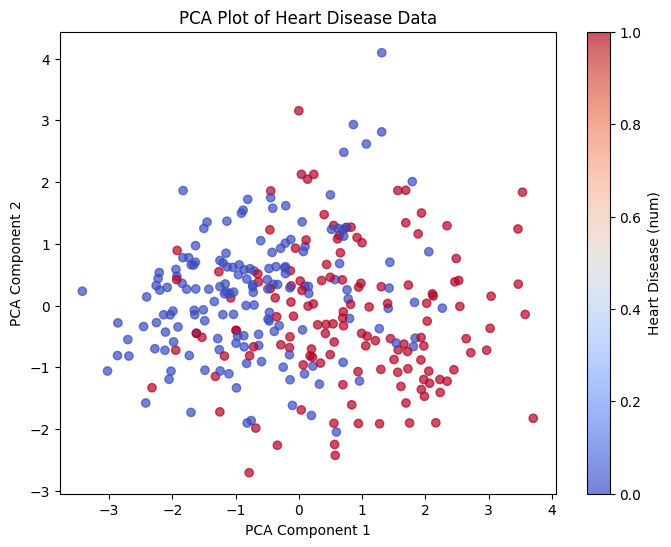

In [16]:
# PCA plotting being done in this cell
# seperation isn't the most clear but I can notice a slight pattern

# Select only numeric columns for PCA (excluding target 'num')
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
X = df[numeric_cols]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['num'], cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot of Heart Disease Data')
plt.colorbar(scatter, label='Heart Disease (num)')
plt.show()
# ...existing code...

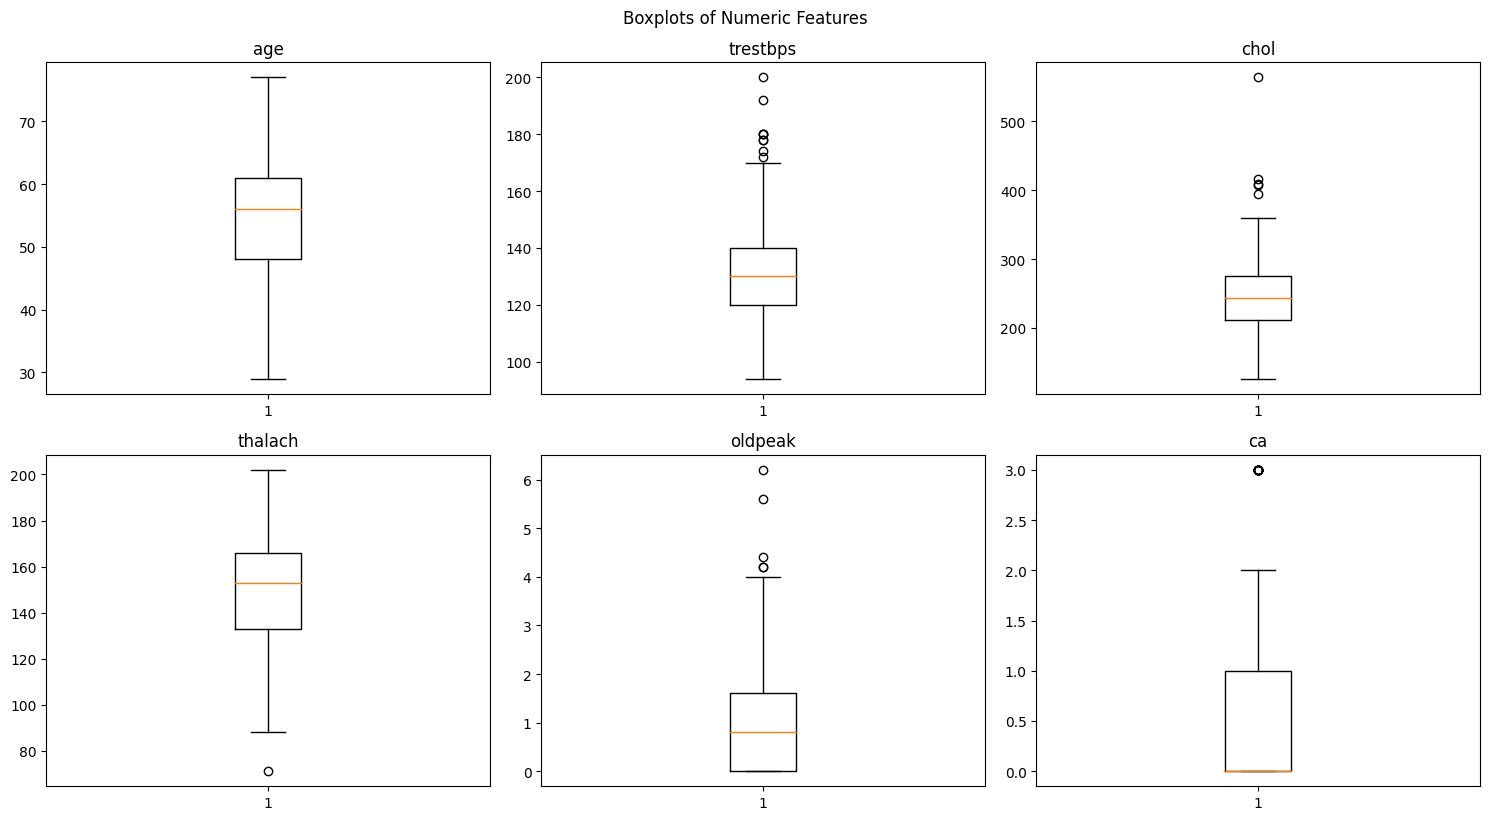

In [17]:
# Boxplots being done here to identify any outliers in the features
# There are some outliers in some columns therefore I will need to identify those rows

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    plt.boxplot(df[col], vert=True)
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplots of Numeric Features', y=1.02)
plt.show()
# ...existing code...

C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\2461526127.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mahal-out'] = mahal_dist > threshold


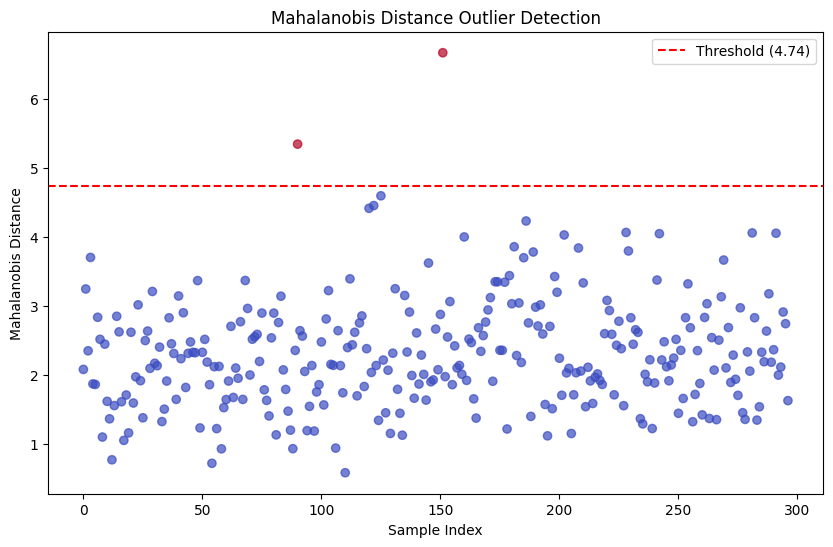

In [18]:
# Mahalanobis Distance Outlier Detection done here

X = df[numeric_cols].values

# Compute mean and covariance matrix
mean_vec = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute Mahalanobis distances for each row
mahal_dist = []
for x in X:
    diff = x - mean_vec
    md = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
    mahal_dist.append(md)
mahal_dist = np.array(mahal_dist)

# Threshold for outlier (using chi-squared distribution, p < 0.001)
threshold = np.sqrt(chi2.ppf(0.999, df=len(numeric_cols)))

# Mark outliers
df['mahal-out'] = mahal_dist > threshold

# Plot Mahalanobis distances
plt.figure(figsize=(10,6))
plt.scatter(range(len(mahal_dist)), mahal_dist, c=df['mahal-out'], cmap='coolwarm', alpha=0.7)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.xlabel('Sample Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance Outlier Detection')
plt.legend()
plt.show()

# Show summary
#print(df['mahal-out'].value_counts())
#df.head()
# ...existing code...

In [19]:
outlier_mask = pd.Series(False, index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound) # Identify outliers in the column
    outlier_mask = outlier_mask | col_outliers # Combine masks to identify any outlier across all columns

# Add 'box-out' column to mark outliers
df['iqr-out'] = outlier_mask

df

C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\1308954839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iqr-out'] = outlier_mask


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,False,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,False,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,False,False
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,False,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1,False,False
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,False,False
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,False,False
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,False,False


In [20]:

# Z-score method to identify outliers being done here

# Calculate Z-scores for numeric columns
z_scores = np.abs(df[numeric_cols].apply(zscore)) # since we also want to consider negative z-scores as outliers e.g. being less than -3, not just above 3

# Mark rows as outliers if any column's Z-score > 3
z_outlier_mask = (z_scores > 3).any(axis=1)

# Add 'z-out' column to mark Z-score outliers
df['zscore-out'] = z_outlier_mask

df

C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\4240277670.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore-out'] = z_outlier_mask


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,False,False,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,False,True,False
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,False,False,False
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,False,False,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1,False,False,False
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,False,False,False
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,False,False,False
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,False,False,False


In [21]:
# Isolation Forest method to identify outliers being done here
X = df[numeric_cols]

# Fit Isolation Forest
#iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest = IsolationForest()
outlier_pred = iso_forest.fit_predict(X)

# IsolationForest returns -1 for outliers, 1 for inliers
df['iso-out'] = (outlier_pred == -1)

C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\1747179701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iso-out'] = (outlier_pred == -1)


In [22]:
df[df["iqr-out"] == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out,iso-out
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,False,True,False,True
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0,False,True,False,False
40,65,0,4,150,225,0,2,114,0,1.0,2,3.0,7.0,1,False,True,False,True
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,0,False,True,True,True
62,58,1,4,128,216,0,2,131,1,2.2,2,3.0,7.0,1,False,True,False,False
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0,1,False,True,False,True
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,1,True,True,True,True
92,62,1,3,130,231,0,0,146,0,1.8,2,3.0,7.0,0,False,True,False,False
104,49,1,3,120,188,0,0,139,0,2.0,2,3.0,7.0,1,False,True,False,True
118,63,1,4,130,330,1,2,132,1,1.8,1,3.0,7.0,1,False,True,False,False


In [23]:
df[df["zscore-out"] == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out,iso-out
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,0,False,True,True,True
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,1,True,True,True,True
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,1,False,True,True,True
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,1,False,True,True,True
126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0,1,False,True,True,True
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,0,True,True,True,True
181,56,0,4,134,409,0,2,150,1,1.9,2,2.0,7.0,1,False,True,True,True
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1,False,True,True,True
245,67,1,4,120,237,0,0,71,0,1.0,2,0.0,3.0,1,False,True,True,True


In [24]:
df[df['iso-out'] == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out,iso-out
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,False,True,False,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,False,False,False,True
29,40,1,4,110,167,0,2,114,1,2.0,2,0.0,7.0,1,False,False,False,True
40,65,0,4,150,225,0,2,114,0,1.0,2,3.0,7.0,1,False,True,False,True
42,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,0,False,False,False,True
48,65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,0,False,True,True,True
68,59,1,4,170,326,0,2,140,1,3.4,3,0.0,7.0,1,False,False,False,True
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0,1,False,True,False,True
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,1,True,True,True,True
103,71,0,3,110,265,1,2,130,0,0.0,1,1.0,3.0,0,False,False,False,True


In [25]:
df[df['mahal-out'] == True] # all the rows identified as outliers by Mahalanobis distance method were also identified by all of the other 3 methods

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out,iso-out
91,62,0,4,160,164,0,2,145,0,6.2,3,3.0,7.0,1,True,True,True,True
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,0,True,True,True,True


In [26]:
#I want to combine all outlier detection methods to create a final outlier score

# List of outlier columns
outlier_cols = ['iqr-out', 'zscore-out', 'iso-out', 'mahal-out']

# Ensure all outlier columns exist in the dataframe
existing_outlier_cols = [col for col in outlier_cols if col in df.columns]

# Calculate outlier score for each row
df['outlier_score'] = df[existing_outlier_cols].sum(axis=1)

# Show summary
print(df['outlier_score'].value_counts())
# ...existing code...

0    239
1     31
2     18
3      7
4      2
Name: outlier_score, dtype: int64


C:\Users\jeenu\AppData\Local\Temp\ipykernel_8256\2994631394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier_score'] = df[existing_outlier_cols].sum(axis=1)


In [28]:
#overall because I don't want to remove too much data, and the outliers detected seem to be outweighed on particular classes
#I will remove the outliers which were identified by all 4 methods

In [27]:
#this line will remove outliers identified by all 4 methods
df = df[df['outlier_score'] < 4]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,mahal-out,iqr-out,zscore-out,iso-out,outlier_score
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,False,False,False,False,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,False,True,False,True,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,False,False,False,False,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,False,False,False,True,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1,False,False,False,False,0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,False,False,False,False,0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1,False,False,False,True,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1,False,False,False,False,0


In [28]:
# will delete the outlier columns now as they are no longer needed
df = df.drop(columns=outlier_cols + ['outlier_score'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


**Class Imbalance Check**

- want to ensure that models are not biased on predictions towards a particular class
- if there is more training data for a specific class, the model will be biased towards the majority class which leads to poor performance for the minority class 
- we will therefore stratify samples from the majority to make in this case both class sizes equal

In [29]:
# based on this there is some class imbalance
# this means we need to stratify
# I will stratify now to ensure stratification is equal for all the classifiers I am testing
# this will ensure the comparisons are fair

df["num"].value_counts()

0    159
1    136
Name: num, dtype: int64

In [30]:
# Remove a random 23 rows where num == 0 to ensure equal class distribution
# this will now allow for fair comparisons between different classifiers

num_0_indices = df[df['num'] == 0].sample(n=23, random_state=42).index
df_balanced = df.drop(index=num_0_indices)

# Check new class distribution
print(df_balanced['num'].value_counts())
df_balanced
# ...existing code...

0    136
1    136
Name: num, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


**Categorical variable encoding**

- now that the previous data has been cleaned, the next step is to encode categorical variables
- this is because some machine learning models only understand numerical inputs, and in this data different categories may be misinterpreted as higher or lower values as numbers were used to represent categories
- therefore the best thing is to do one hot encoding based on the possible category values for each categorical columns as reference to do so
- I'm aware some models don't require this such as RandomForest however since most models I may plan to use for classification may require this, then it may be easiest to do the encoding beforeahdn

In [31]:
# This cell will get all unique values for all categorical columns
# this is to verify that the website documentation matches the actual data
# looking at the unique, there is alignment with the documentation
# this means I can do one hot encoding and can align the documentation category names as labels

# Identify categorical columns (object or integer with few unique values)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_cols:
    if col in df_balanced.columns:
        print(f"Unique values in '{col}': {df[col].unique()}")
# ...existing code...

Unique values in 'sex': [1 0]
Unique values in 'cp': [1 4 3 2]
Unique values in 'fbs': [1 0]
Unique values in 'restecg': [2 0 1]
Unique values in 'exang': [0 1]
Unique values in 'slope': [3 2 1]
Unique values in 'thal': [6. 3. 7.]


In [32]:
# ...existing code...
# One-hot encode all categorical columns and rename columns based on category descriptions

# Define categorical columns and their category descriptions
category_labels = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {1: 'TypicalAngina', 2: 'AtypicalAngina', 3: 'NonAnginalPain', 4: 'Asymptomatic'},
    'fbs': {0: '<=120', 1: '>120'},
    'restecg': {0: 'NormalECG', 1: 'STTAbnormality', 2: 'LVHypertrophy'},
    'exang': {0: 'NoExAngina', 1: 'YesExAngina'},
    'slope': {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'},
    'thal': {3: 'Normal', 6: 'FixedDefect', 7: 'ReversibleDefect'}
}

# Replace category values with descriptive labels
df_encoded = df_balanced.copy()
for col, mapping in category_labels.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)

# One-hot encode
df_encoded = pd.get_dummies(df_encoded, columns=list(category_labels.keys()))

# Show the new columns
print("Encoded columns:", df_encoded.columns.tolist())
df_encoded
# ...existing code...

Encoded columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num', 'sex_Female', 'sex_Male', 'cp_Asymptomatic', 'cp_AtypicalAngina', 'cp_NonAnginalPain', 'cp_TypicalAngina', 'fbs_<=120', 'fbs_>120', 'restecg_LVHypertrophy', 'restecg_NormalECG', 'restecg_STTAbnormality', 'exang_NoExAngina', 'exang_YesExAngina', 'slope_Downsloping', 'slope_Flat', 'slope_Upsloping', 'thal_FixedDefect', 'thal_Normal', 'thal_ReversibleDefect']


,age,trestbps,chol,thalach,oldpeak,ca,num,sex_Female,sex_Male,cp_Asymptomatic,...,restecg_NormalECG,restecg_STTAbnormality,exang_NoExAngina,exang_YesExAngina,slope_Downsloping,slope_Flat,slope_Upsloping,thal_FixedDefect,thal_Normal,thal_ReversibleDefect
0,63,145,233,150,2.3,0.0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,67,160,286,108,1.5,3.0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120,229,129,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130,250,187,3.5,0.0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,41,130,204,172,1.4,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,0.0,1,1,0,1,...,1,0,0,1,0,1,0,0,0,1
298,45,110,264,132,1.2,0.0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
299,68,144,193,141,3.4,2.0,1,0,1,1,...,1,0,1,0,0,1,0,0,0,1
300,57,130,131,115,1.2,1.0,1,0,1,1,...,1,0,0,1,0,1,0,0,0,1


In [33]:
# reordering columns to have target variable at the end
# ...existing code...
# Move target column to the end and rename it to 'heartdiseasepresence'

target_col = 'num'
new_target_col = 'heartdiseasepresence'

if target_col in df_encoded.columns:
    # Rename the target column
    df_encoded = df_encoded.rename(columns={target_col: new_target_col})
    # Move the target column to the end
    cols = [col for col in df_encoded.columns if col != new_target_col] + [new_target_col]
    df_encoded = df_encoded[cols]

df_encoded
# ...existing code...

,age,trestbps,chol,thalach,oldpeak,ca,sex_Female,sex_Male,cp_Asymptomatic,cp_AtypicalAngina,...,restecg_STTAbnormality,exang_NoExAngina,exang_YesExAngina,slope_Downsloping,slope_Flat,slope_Upsloping,thal_FixedDefect,thal_Normal,thal_ReversibleDefect,heartdiseasepresence
0,63,145,233,150,2.3,0.0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,67,160,286,108,1.5,3.0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,67,120,229,129,2.6,2.0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1
3,37,130,250,187,3.5,0.0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0.0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,0.0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
298,45,110,264,132,1.2,0.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
299,68,144,193,141,3.4,2.0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
300,57,130,131,115,1.2,1.0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1


**Feature Standardisation**
- now I need to standardise the numerical columns
- this will ensure that one feature doesn't outweigh the impact of a models outputs compared to another, which will therefore ensure each feature has equal importance to the prediction
- I will use a standard scaler for this if the feature follows a normal distribution otherwise I will do a log transformation if the features are highly skewed

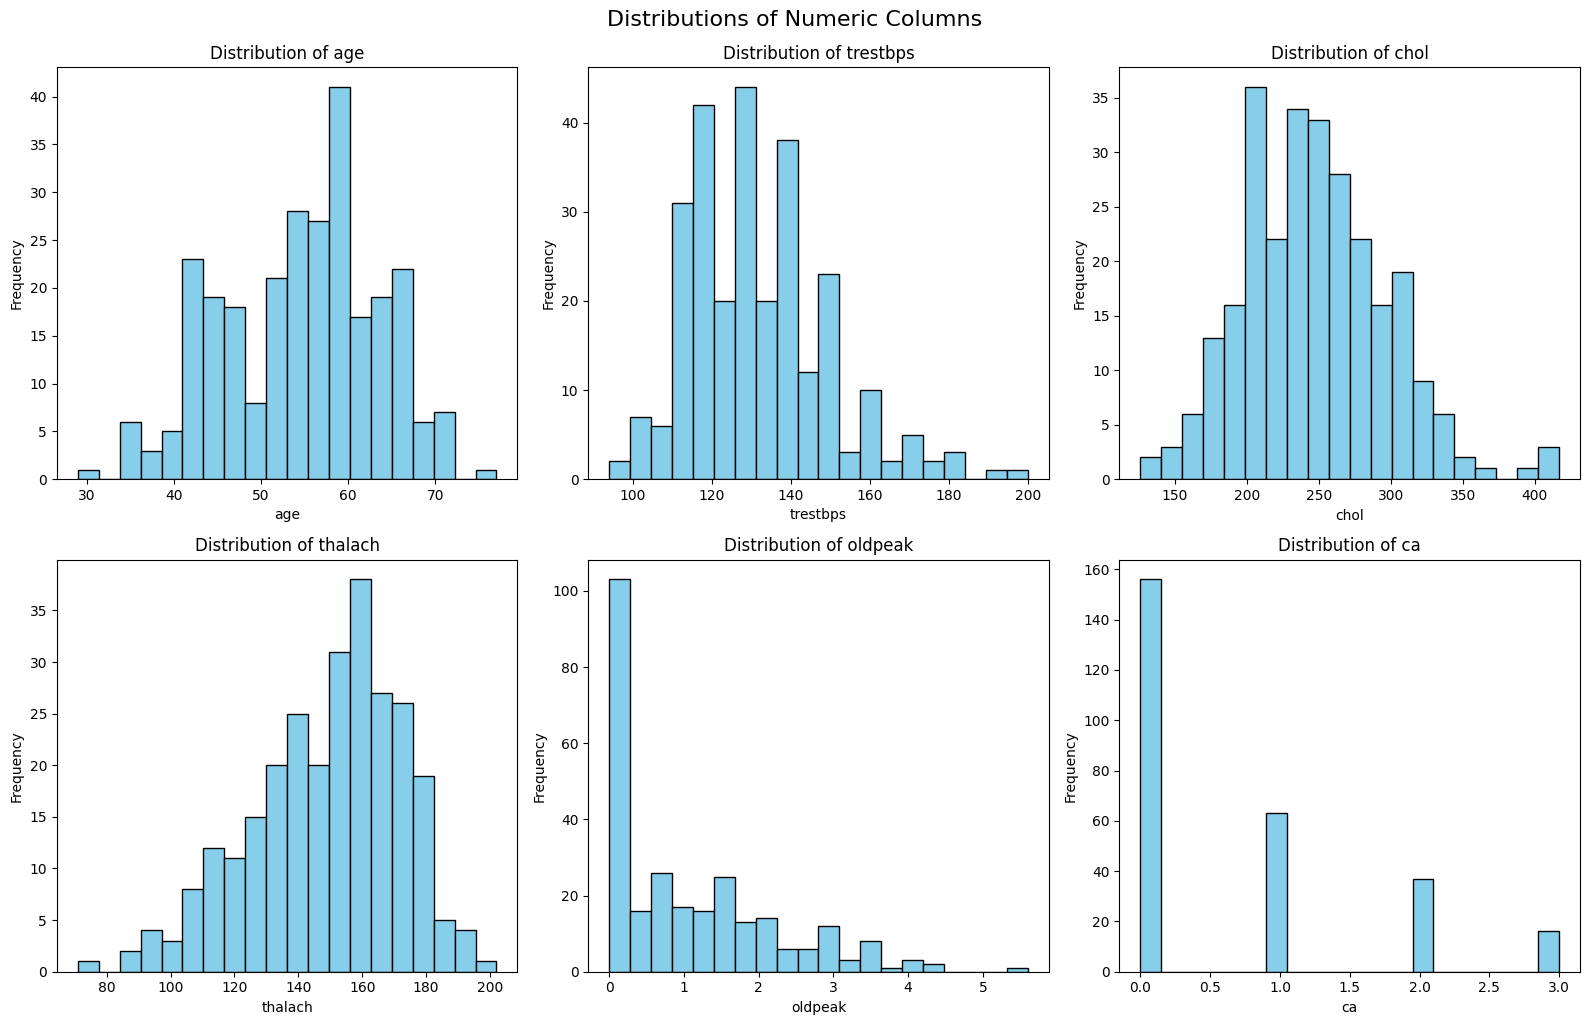

In [34]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

# Plot distributions for each numeric column
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_encoded[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Distributions of Numeric Columns', y=1.02, fontsize=16)
plt.show()

In [35]:
# looking at this data oldpeak seems to be left skewed and may need log transformation
# alongside this, every other feature should use standard scaling as it looks relatively normal distributed

df_encoded['oldpeak_log'] = np.log1p(df_encoded['oldpeak'])

# Replace original 'oldpeak' with log-transformed version
df_encoded['oldpeak'] = df_encoded['oldpeak_log']
df_encoded = df_encoded.drop(columns=['oldpeak_log'])

# Standard scale all numeric columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded

,age,trestbps,chol,thalach,oldpeak,ca,sex_Female,sex_Male,cp_Asymptomatic,cp_AtypicalAngina,...,restecg_STTAbnormality,exang_NoExAngina,exang_YesExAngina,slope_Downsloping,slope_Flat,slope_Upsloping,thal_FixedDefect,thal_Normal,thal_ReversibleDefect,heartdiseasepresence
0,0.950883,0.743598,-0.289108,0.040935,1.180495,-0.740979,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,1.397584,1.593663,0.785340,-1.757678,0.647625,2.527338,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,1.397584,-0.673176,-0.370199,-0.858371,1.347500,1.437899,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1
3,-1.952676,-0.106466,0.055526,1.625427,1.775790,-0.740979,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,-1.505975,-0.106466,-0.877014,0.983065,0.569273,-0.740979,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.280831,0.460243,-0.126927,-1.115316,-0.761115,-0.740979,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
298,-1.059273,-1.239886,0.339343,-0.729899,0.402268,-0.740979,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1
299,1.509259,0.686927,-1.100013,-0.344482,1.732656,1.437899,0,1,1,0,...,0,1,0,0,1,0,0,0,1,1
300,0.280831,-0.106466,-2.356915,-1.457909,0.402268,0.348460,0,1,1,0,...,0,0,1,0,1,0,0,0,1,1


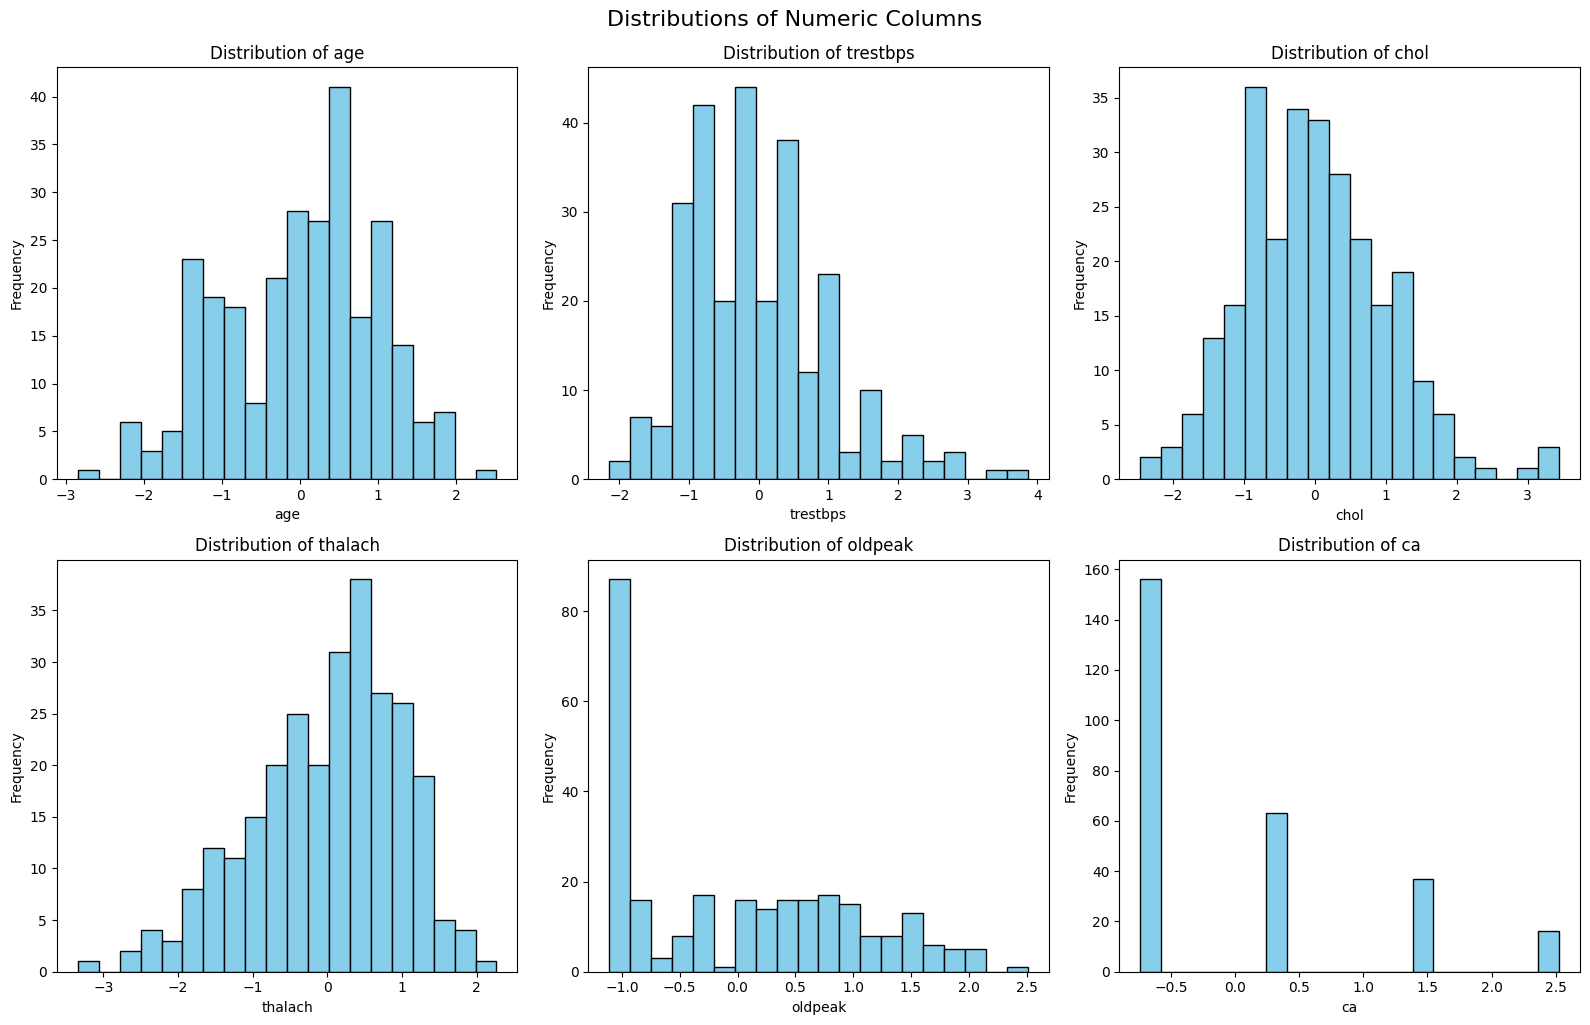

In [36]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_encoded[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle('Distributions of Numeric Columns', y=1.02, fontsize=16)
plt.show()

In [37]:
# Standardize features using StandardScaler
#scaler = StandardScaler()
#feature_cols = df_encoded.columns.difference(['heartdiseasepresence'])

In [37]:
df_encoded.to_csv('heart_disease_preprocessed.csv', header=True, index=False)

**Feature Descriptions based on https://archive.ics.uci.edu/dataset/45/heart%2Bdisease**

1. **Age** (Integer)
   - Patient's age in years

2. **Sex** (Categorical)
   - 0 = Female
   - 1 = Male

### Clinical Features
3. **CP - Chest Pain Type** (Categorical)
   - 1 = Typical angina
   - 2 = Atypical angina
   - 3 = Non-anginal pain
   - 4 = Asymptomatic

4. **Trestbps - Resting Blood Pressure** (Integer)
   - Measured in mm Hg on hospital admission
   - Normal range: 90-120 mm Hg

5. **Chol - Serum Cholesterol** (Integer)
   - Measured in mg/dl
   - Normal range: Below 200 mg/dl

6. **FBS - Fasting Blood Sugar** (Categorical)
   - 0 = ≤ 120 mg/dl
   - 1 = > 120 mg/dl

7. **Restecg - Resting ECG Results** (Categorical)
   - 0 = Normal
   - 1 = ST-T wave abnormality
   - 2 = Left ventricular hypertrophy

8. **Thalach - Maximum Heart Rate** (Integer)
   - Maximum achieved during exercise
   - Range: 120-200 beats per minute

9. **Exang - Exercise Induced Angina** (Categorical)
   - 0 = No
   - 1 = Yes

10. **Oldpeak** (Integer)
    - ST depression induced by exercise relative to rest

11. **Slope** (Categorical)
    - Slope of peak exercise ST segment
    - 1 = Upsloping
    - 2 = Flat
    - 3 = Downsloping

12. **CA - Number of Major Vessels** (Integer)
    - Range: 0-3
    - Colored by fluoroscopy
    - *Contains missing values*

13. **Thal - Thallium Stress Test** (Categorical)
    - 3 = Normal
    - 6 = Fixed defect
    - 7 = Reversible defect
    - *Contains missing values*

### Target Variable
14. **Num - Heart Disease Diagnosis** (Integer)
    - 0 = No heart disease
    - 1,2,3 or 4 = Heart disease present